In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve,classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('train_data.csv')
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [4]:
for i in df.columns:
    print(i, end=' ')
    print(df[i].nunique())

case_id 318438
Hospital_code 32
Hospital_type_code 7
City_Code_Hospital 11
Hospital_region_code 3
Available Extra Rooms in Hospital 18
Department 5
Ward_Type 6
Ward_Facility_Code 6
Bed Grade 4
patientid 92017
City_Code_Patient 37
Type of Admission 3
Severity of Illness 3
Visitors with Patient 28
Age 10
Admission_Deposit 7300
Stay 11


In [5]:
df['Stay'].replace({'0-10': 5,
        '11-20': 15,
        '21-30': 25,
        '31-40': 35,
        '41-50': 45,
        '51-60': 55,
        '61-70': 65,
        '71-80': 75,
        '81-90': 85,
        '91-100': 95,
         'More than 100 Days' :101},inplace=True)

In [6]:
df['Stay'].unique()

array([  5,  45,  35,  15,  55,  25,  75, 101,  85,  65,  95], dtype=int64)

In [7]:
df.Stay.value_counts()

25     87491
15     78139
35     55159
55     35018
5      23604
45     11743
75     10254
101     6683
85      4838
95      2765
65      2744
Name: Stay, dtype: int64

In [8]:
df['Age'].replace({ '0-10': 5,
    '11-20': 15,
    '21-30': 25,
    '31-40': 35,
    '41-50': 45,
    '51-60': 55,
    '61-70': 65,
    '71-80': 75,
    '81-90': 85,
    '91-100': 95},inplace=True)

In [9]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,55,4911.0,5
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,55,5954.0,45
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,55,4745.0,35
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,55,7272.0,45
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,55,5558.0,45


In [10]:
df['Severity of Illness'].replace({'Extreme': 3,
        'Moderate': 2,
        'Minor': 1,},inplace=True)

In [11]:
df.Hospital_type_code.unique()

array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object)

In [12]:
df['Hospital_type_code'].replace({'a': 0,
        'b': 1,
        'c': 2,'d': 3, 'e': 4, 'f':5, 'g': 6},inplace=True)

In [13]:
df.Hospital_region_code.unique()

array(['Z', 'X', 'Y'], dtype=object)

In [14]:
df['Hospital_region_code'].replace({'X': 0,
        'Y': 1,
        'Z': 2},inplace=True)

In [15]:
df.Department.unique()

array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
       'surgery'], dtype=object)

In [16]:
df['Department'].replace({'radiotherapy': 0,
        'anesthesia': 1,
        'gynecology': 2,'TB & Chest disease': 3, 'surgery': 4 },inplace=True)

In [17]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,0,R,F,2.0,31397,7.0,Emergency,3,2,55,4911.0,5
1,2,2,2,5,2,2,0,S,F,2.0,31397,7.0,Trauma,3,2,55,5954.0,45
2,3,10,4,1,0,2,1,S,E,2.0,31397,7.0,Trauma,3,2,55,4745.0,35
3,4,26,1,2,1,2,0,R,D,2.0,31397,7.0,Trauma,3,2,55,7272.0,45
4,5,26,1,2,1,2,0,S,D,2.0,31397,7.0,Trauma,3,2,55,5558.0,45


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  int64  
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  int64  
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  int64  
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [19]:
df.Ward_Type.unique()

array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object)

In [20]:
df['Ward_Type'].replace({'P': 0,
        'Q': 1,
        'R': 2,'S': 3, 'T': 4, 'U':5 },inplace=True)

In [21]:
df.Ward_Facility_Code.unique()

array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object)

In [22]:
df['Ward_Facility_Code'].replace({'A': 0,
        'B': 1,
        'C': 2,'D': 3, 'E': 4, 'F':5 },inplace=True)

In [23]:
df['Type of Admission'].unique()

array(['Emergency', 'Trauma', 'Urgent'], dtype=object)

In [24]:
df['Type of Admission'].replace({'Emergency': 0,
        'Trauma': 1,
        'Urgent': 2},inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  int64  
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  int64  
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  int64  
 7   Ward_Type                          318438 non-null  int64  
 8   Ward_Facility_Code                 318438 non-null  int64  
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  int64  
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  int64  
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  int64  
 7   Ward_Type                          318438 non-null  int64  
 8   Ward_Facility_Code                 318438 non-null  int64  
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [27]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [28]:
df[pd.isnull(df["Bed Grade"])]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
293,294,6,0,6,0,4,2,1,5,NaN,27075,15.0,1,3,2,25,4420.0,35
1071,1072,6,0,6,0,2,2,1,5,NaN,62491,8.0,1,3,4,65,5395.0,25
20379,20380,6,0,6,0,4,2,1,5,NaN,69932,2.0,1,3,3,45,5989.0,35
23791,23792,6,0,6,0,3,2,2,5,NaN,29943,10.0,0,1,3,35,4488.0,45
25162,25163,6,0,6,0,5,2,2,5,NaN,92499,1.0,0,1,2,75,4885.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234337,234338,6,0,6,0,2,0,2,5,NaN,22881,7.0,0,1,2,15,2416.0,5
234577,234578,6,0,6,0,2,2,2,5,NaN,120677,2.0,1,3,4,45,4932.0,55
234895,234896,6,0,6,0,2,2,2,5,NaN,111514,1.0,1,2,4,55,3984.0,15
235048,235049,6,0,6,0,2,2,2,5,NaN,57706,2.0,1,2,3,45,4139.0,55


In [29]:
df[df['Ward_Facility_Code']==5]

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,0,2,5,2.0,31397,7.0,0,3,2,55,4911.0,5
1,2,2,2,5,2,2,0,3,5,2.0,31397,7.0,1,3,2,55,5954.0,45
5,6,23,0,6,0,2,1,3,5,2.0,31397,7.0,1,3,2,55,4449.0,15
7,8,23,0,6,0,4,0,1,5,3.0,31397,7.0,1,3,2,55,5571.0,45
13,14,9,3,5,2,3,0,3,5,3.0,31397,7.0,2,3,2,55,8477.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318428,318429,23,0,6,0,2,2,1,5,4.0,26631,10.0,2,1,2,15,4125.0,15
318430,318431,6,0,6,0,3,1,1,5,4.0,109796,8.0,1,2,2,45,5065.0,25
318431,318432,23,0,6,0,3,1,1,5,4.0,120672,2.0,2,3,2,75,4508.0,15
318433,318434,6,0,6,0,3,0,1,5,4.0,86499,23.0,0,2,3,45,4144.0,15


In [30]:
df['Bed Grade'].median()

3.0

In [31]:
df.corr()['Stay'].sort_values()[:-1]

Available Extra Rooms in Hospital   -0.121163
case_id                             -0.054458
Admission_Deposit                   -0.051920
City_Code_Patient                   -0.009885
Ward_Facility_Code                  -0.004340
Department                          -0.000871
patientid                            0.001120
City_Code_Hospital                   0.006450
Hospital_region_code                 0.011779
Type of Admission                    0.024304
Bed Grade                            0.024798
Hospital_code                        0.042962
Hospital_type_code                   0.059107
Age                                  0.094211
Severity of Illness                  0.126388
Ward_Type                            0.185554
Visitors with Patient                0.534278
Name: Stay, dtype: float64

In [32]:
df['Bed Grade'].fillna(df['Bed Grade'].median(),inplace=True)

In [33]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                               0
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [34]:
for i in df.columns:
    print(i, end=' ')
    print(df[i].nunique())

case_id 318438
Hospital_code 32
Hospital_type_code 7
City_Code_Hospital 11
Hospital_region_code 3
Available Extra Rooms in Hospital 18
Department 5
Ward_Type 6
Ward_Facility_Code 6
Bed Grade 4
patientid 92017
City_Code_Patient 37
Type of Admission 3
Severity of Illness 3
Visitors with Patient 28
Age 10
Admission_Deposit 7300
Stay 11


In [35]:
df.drop('case_id',axis = 1,inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  int64  
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  int64  
 6   Ward_Type                          318438 non-null  int64  
 7   Ward_Facility_Code                 318438 non-null  int64  
 8   Bed Grade                          318438 non-null  float64
 9   patientid                          318438 non-null  int64  
 10  City_Code_Patient                  313906 non-null  float64
 11  Type of Admission                  3184

In [44]:
df[pd.isnull(df["City_Code_Patient"])]

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay


In [45]:
df.City_Code_Patient.median()

8.0

In [46]:
df.City_Code_Patient.mean()

7.262506359165678

In [47]:
df['City_Code_Patient'].fillna(df['City_Code_Patient'].median(),inplace=True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


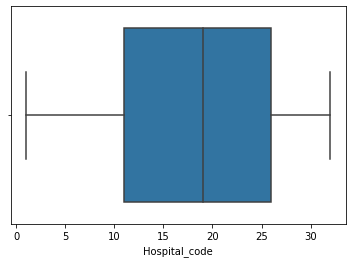

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


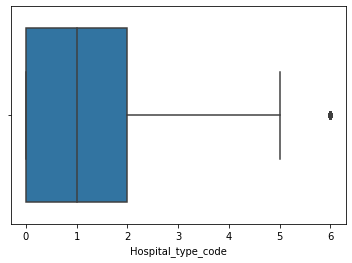

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


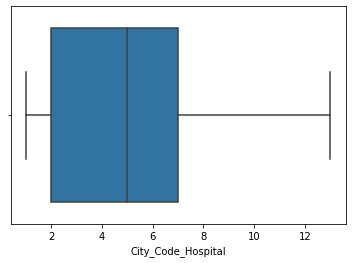

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


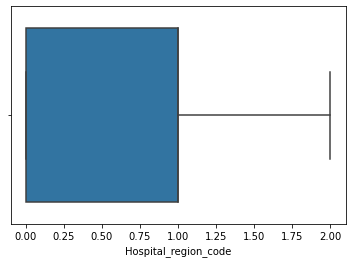

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


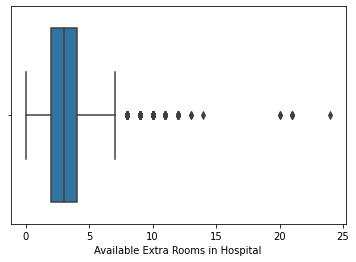

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


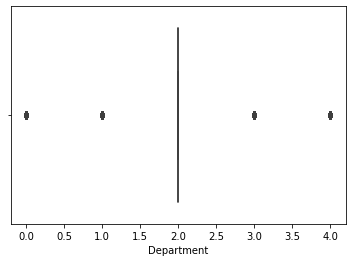

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


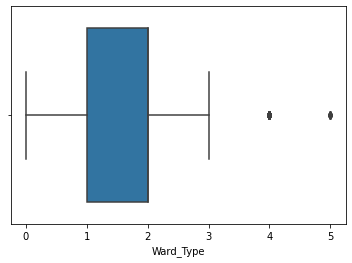

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


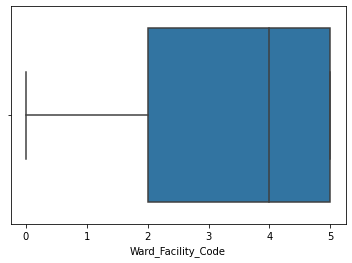

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


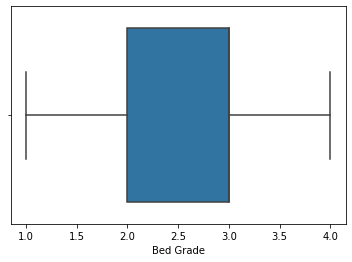

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


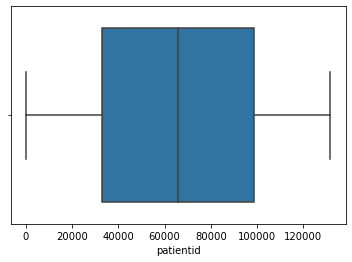

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


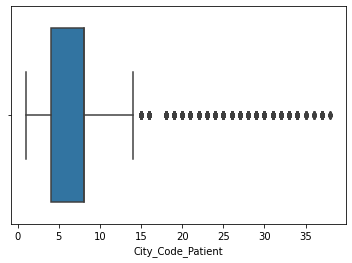

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


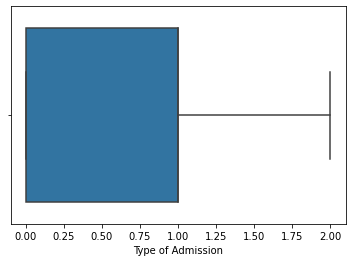

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


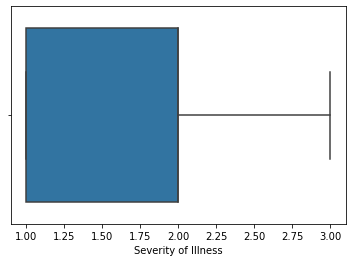

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


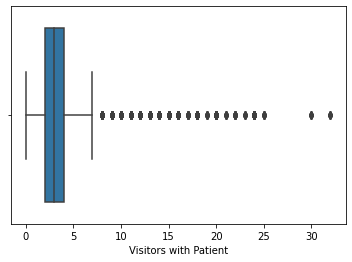

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


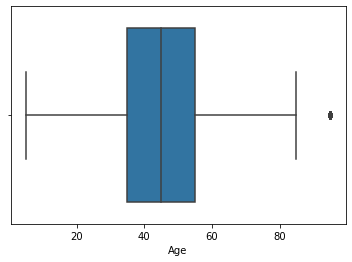

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


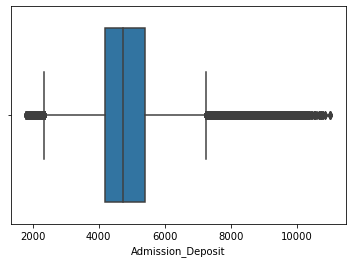

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


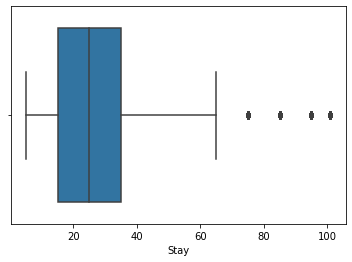

In [49]:
for i in df:
    sns.boxplot(df[i])
    plt.show()

In [50]:
df['Admission_Deposit'] = np.log(df['Admission_Deposit'])
df.Admission_Deposit

0         8.499233
1         8.691819
2         8.464847
3         8.891787
4         8.622994
            ...   
318433    8.329417
318434    8.809714
318435    8.351139
318436    8.232440
318437    8.466321
Name: Admission_Deposit, Length: 318438, dtype: float64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      318438 non-null  int64  
 1   Hospital_type_code                 318438 non-null  int64  
 2   City_Code_Hospital                 318438 non-null  int64  
 3   Hospital_region_code               318438 non-null  int64  
 4   Available Extra Rooms in Hospital  318438 non-null  int64  
 5   Department                         318438 non-null  int64  
 6   Ward_Type                          318438 non-null  int64  
 7   Ward_Facility_Code                 318438 non-null  int64  
 8   Bed Grade                          318438 non-null  float64
 9   patientid                          318438 non-null  int64  
 10  City_Code_Patient                  318438 non-null  float64
 11  Type of Admission                  3184

In [52]:
df.drop('patientid',axis = 1,inplace=True)

## MODEL BUILDING

In [53]:
X = df.drop(['Stay'],axis=1)
y = df['Stay']

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1) Logistic Regression()

In [278]:
model = LogisticRegression()

In [279]:
model.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [280]:
y_pred = model.predict(X_test)

In [281]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[    0  2167  2404   112     0     6     0     0     0     0     0]
 [    0  6863  7321   925     0   446     0     0     0     0     6]
 [    0  5482 11356   520     0   228     0     0     0     0    17]
 [    0  2421  4386  2593     0  1532     0     0     0     0    49]
 [    0   672  1302   219     0   147     0     0     0     0    17]
 [    0   729  1139  2550     0  2607     0     0     0     0   103]
 [    0   113   256    77     0    97     0     0     0     0    11]
 [    0   170   255   725     0   781     0     0     0     0   100]
 [    0    32    63   118     0   654     0     0     0     0    74]
 [    0    37    79   197     0   185     0     0     0     0    54]
 [    0    61   101   171     0   637     0     0     0     0   321]]


              precision    recall  f1-score   support

           5       0.00      0.00      0.00      4689
          15       0.37      0.44      0.40     15561
          25       0.40      0.65      0.49     17603
          35       0.

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### accuracy = 37%

# 2) RANDOM FOREST

In [282]:
rf = RandomForestClassifier(n_estimators=100)

In [283]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [284]:
rf_pred = rf.predict(X_test)

In [285]:
print(classification_report(y_test,rf_pred))
print('------------------------------------------------------------------')
print(confusion_matrix(y_test,rf_pred))

              precision    recall  f1-score   support

           5       0.29      0.20      0.23      4689
          15       0.39      0.45      0.41     15561
          25       0.42      0.53      0.47     17603
          35       0.33      0.27      0.29     10981
          45       0.09      0.02      0.04      2357
          55       0.40      0.45      0.42      7128
          65       0.06      0.01      0.02       554
          75       0.27      0.10      0.15      2031
          85       0.34      0.17      0.23       941
          95       0.25      0.06      0.10       552
         101       0.53      0.43      0.47      1291

    accuracy                           0.38     63688
   macro avg       0.31      0.24      0.26     63688
weighted avg       0.36      0.38      0.37     63688

------------------------------------------------------------------
[[ 915 1999 1459  217   35   46   10    8    0    0    0]
 [ 922 6944 5620 1339  111  549   19   32    7   10    8]
 [ 6

#### Accuracy = 41%

## 3) KNN

In [286]:
from sklearn.neighbors import KNeighborsClassifier

In [287]:
knn = KNeighborsClassifier(n_neighbors=100,n_jobs=-1)

In [288]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=100)

In [289]:
knn_pred = knn.predict(X_test)
print(classification_report(y_test,knn_pred))
print('\n')
print(confusion_matrix(y_test,knn_pred))

C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           5       0.23      0.00      0.01      4689
          15       0.38      0.42      0.40     15561
          25       0.36      0.71      0.48     17603
          35       0.32      0.14      0.20     10981
          45       0.00      0.00      0.00      2357
          55       0.35      0.31      0.33      7128
          65       0.00      0.00      0.00       554
          75       0.17      0.00      0.00      2031
          85       0.00      0.00      0.00       941
          95       0.00      0.00      0.00       552
         101       0.56      0.19      0.29      1291

    accuracy                           0.36     63688
   macro avg       0.22      0.16      0.15     63688
weighted avg       0.32      0.36      0.31     63688



[[   12  2020  2569    69     0    19     0     0     0     0     0]
 [   15  6607  8034   560     0   343     0     2     0     0     0]
 [   12  4521 12550   330     0   183     0    

#### accuracy =37%